In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Parameters

In [2]:
N = 40
F = 8.0
x0 = F * np.ones(N)
x0[0] += 0.01

In [3]:
def l96_model(x):
    d = np.zeros(N)
    for i in range(N):
        d[i] = (x[(i+1)%N] - x[i-2]) * x[i-1] - x[i] + F
    return d


def l96_step(x, dt):
    k1 = l96_model(x) * dt
    k2 = l96_model(x + k1/2) * dt
    k3 = l96_model(x + k2/2) * dt
    k4 = l96_model(x + k3) * dt
    x = x + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return x


In [4]:
def l96_loop(x0, t_end):
    t = 0.0
    dt = 0.01
    x_ls = []
    x_ls.append(x0)
    x = x0

    while(t + dt< t_end):
        x = l96_step(x, dt)
        x_ls.append(x)
        t += dt
    x_ls = np.array(x_ls)
    return x_ls


In [7]:
x_ls = l96_loop(x0, 10.0)

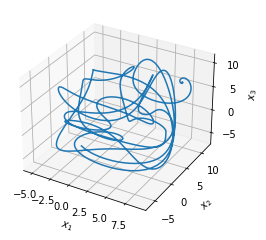

In [8]:
# Plot the first three variables
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x_ls[:, 0], x_ls[:, 1], x_ls[:, 2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

## リアプノフ指数の計算
正確にやるためには何が必要？
->　アトラクター上の様々な点から計測する
1年分スピンアップで捨てた後ノイズを加えたものと加えていないものの誤差を測定する
半年ごとに10年取る

In [13]:
year = 73.0
ly_data = l96_loop(x0, 10 * year)

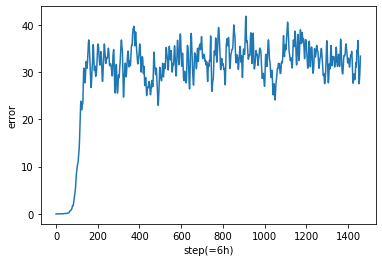

In [38]:
y = 1.0
#while y <= 10.0:
base = ly_data[int(y * year * 100)]
noise = np.zeros_like(base)
noise[0] += 0.01
out = l96_loop(base, year) - l96_loop(base+noise, year)
out = np.linalg.norm(out,axis=1)
plt.plot(out[::5])
plt.xlabel('step(=6h)')
plt.ylabel('error')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

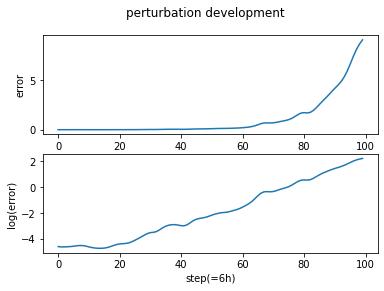

In [39]:
out_zoom = out[:500]
out_zoom = out_zoom[::5]
fig, ax = plt.subplots(2)
fig.suptitle('perturbation development')
ax[0].plot(out_zoom)
ax[1].plot(np.log(out_zoom))
ax[1].set_xlabel('step(=6h)')
ax[0].set_ylabel('error')
ax[1].set_ylabel('log(error)')
plt.show

# 2年分足し合わせる
2 * 365 * 4 * 0.05 = 146.0 step必要

In [10]:
twoy = 146.0
data = l96_loop(x0, twoy)
print(data.shape)
data = data[::5] # 6hごとに圧縮
data = data[int(data.shape[0]/2):] # ２年めのみを使う


(14600, 40)


In [61]:
print(data[0])

[ 3.73972009  5.0818905   1.8831919  -2.96759682  2.09667497  2.91926057
 10.26754184 -2.61767505 -1.20824939 -0.99769068  2.17496582  6.47420229
  1.27741554 -3.35782869 -0.17156987 -5.28834285 -0.36133256  9.38708514
  7.02829646  6.1431077   4.03196919 -2.69435818  3.45771701 11.95515543
  1.45649789 -1.06537432  1.35330969 -0.17528414  2.55640281  6.3852554
  6.18010162  1.696851   -1.87662797 -0.11911194  4.66623823  9.10878121
  0.22889094  1.16859856 -1.66642582  1.60676217]


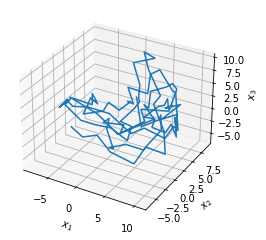

In [67]:
# Plot the first three variables
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(data[:100, 0], data[:100, 1], data[:100, 2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

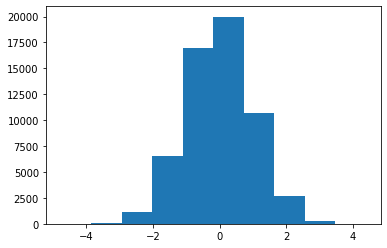

In [68]:
random_ls = np.random.randn(data.shape[0], data.shape[1])
plt.hist(np.ravel(random_ls))
plt.show()

In [69]:
data = data + random_ls
np.savetxt("data.txt", data)